In [3]:

#libraries

import os
import pandas as pd
import numpy as np
import itertools
from scipy.stats import zscore

from sklearn.feature_selection import RFE
from sklearn.svm import  LinearSVC
from sklearn.metrics import classification_report, make_scorer, accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, cross_val_predict

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [4]:
index_REC_1 = np.load(r'out/index_REC_1.npy', allow_pickle= True).tolist()
index_REC_21 = np.load(r'out/index_REC_21.npy', allow_pickle= True).tolist()
index_REC_42 = np.load(r'out/index_REC_42.npy', allow_pickle= True).tolist()
index_REC_64 = np.load(r'out/index_REC_64.npy', allow_pickle= True).tolist()
index_REC_128 = np.load(r'out/index_REC_128.npy', allow_pickle= True).tolist()

index_REC = [index_REC_1] + [index_REC_21] + [index_REC_42] + [index_REC_64] + [index_REC_128]

index_RFE_1 = np.load(r'out/index_RFE_1.npy', allow_pickle= True).tolist()
index_RFE_21 = np.load(r'out/index_RFE_21.npy', allow_pickle= True).tolist()
index_RFE_42 = np.load(r'out/index_RFE_42.npy', allow_pickle= True).tolist()
index_RFE_64 = np.load(r'out/index_RFE_64.npy', allow_pickle= True).tolist()
index_RFE_128 = np.load(r'out/index_RFE_128.npy', allow_pickle= True).tolist()

index_RFE = [index_RFE_1] + [index_RFE_21] + [index_RFE_42] + [index_RFE_64] + [index_RFE_128]


[[[0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4]], [[0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 

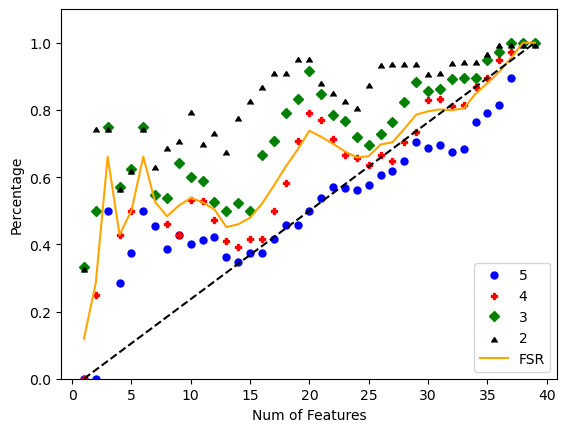

<Figure size 640x480 with 0 Axes>

In [5]:
import itertools
##### coincidence between methods (total and partial)

coincidences = []
for t in range(len(index_REC[0])):

    auxiliar = list(itertools.chain(*[index_RFE[0][t]] + [index_RFE[1][t]] + [index_RFE[2][t]] +[index_RFE[3][t]] + [index_RFE[4][t]]))
    
    auxiliar = list(set(auxiliar))
     
    ele_repeated_in = {}
    for ele in auxiliar:

        Seeds = []
        for seed in range(0,len(index_REC)):

            if ele in index_RFE[seed][t]:  # poner esto después del primer for para generalizar para este caso en concreto
                Seeds.append(seed)

        ele_repeated_in[ele] = Seeds  # Diccionario con las veces que se repite cada elemento (keys) en los 5 seeds diferentes (values es el seed en el que se repite)
    
    coincidences.append(ele_repeated_in)



def Partial_coincidence(coincidences, num_of_coinc):

    percentage_of_repetaed_list = []
    Keys_list = []            #keys
    Seeds_list = []           #seeds ehre the key is repeated
    for t in range(len(coincidences)):

        list_of_keys = list(coincidences[t].keys())
        #list_of_values = list(coincidences[t].values())

        keys_list = []  #keys
        seeds_list = [] #seeds ehre the key is repeated
        count = 0
        for key in list_of_keys:

            if len(coincidences[t][key]) >= num_of_coinc:

                count += 1
                seeds_list.append(coincidences[t][key])
                keys_list.append(list_of_keys)
        
        Seeds_list.append(seeds_list)
        Keys_list.append(keys_list)
        percentage_of_repetaed_list.append(count/len(list_of_keys))

    print(Seeds_list , Keys_list)
    return [percentage_of_repetaed_list, Seeds_list , Keys_list]

    
list_5 = Partial_coincidence(coincidences, 5)[0]
list_4 = Partial_coincidence(coincidences, 4)[0]
list_3 = Partial_coincidence(coincidences, 3)[0]
list_2 = Partial_coincidence(coincidences, 2)[0]


list_5.reverse()
list_4.reverse()
list_3.reverse()
list_2.reverse()
#print(coincidences)


def FSR(list_5, list_4, list_3, list_2 ):

    out = []
    for i in range(len(list_5)):

        suma = 5 * list_5[i] + 4*list_4[i] + 3*list_3[i] + 2*list_2[i] 
        out.append(suma/14)

    return out

fsr = FSR(list_5, list_4, list_3, list_2 )
#print(fsr)

y = [*range(1 , len(index_REC[0]) + 1)]
x = np.linspace(0,  1 , num=len(index_REC[0]) )


plt.plot(y, list_5, label = "5", marker='o', color =  "blue", markersize=5, linestyle= "None")
plt.plot(y, list_4, label = "4", marker='P', color = "red", markersize=5, linestyle= "None")
plt.plot(y, list_3, label = "3", marker='D', color = "green", markersize=5, linestyle= "None")
plt.plot(y, list_2, label = "2", marker=6 , color = "black", markersize=5, linestyle= "None")
plt.plot(y, fsr, label = "FSR",  color = "orange" )
plt.plot(y, x, color =  "black", markersize=5, linestyle= "--")


plt.legend(loc='lower right')
plt.xlabel("Num of Features")
plt.ylabel("Percentage")
#plt.savefig(r'DATASETS/heart_disease/Pictures/Percentage_repeated_RFE.png', dpi = 300 )
#plt.yscale('log')
plt.ylim([0.0, 1.1])
#plt.title("Recall per class")
plt.show()
plt.clf()


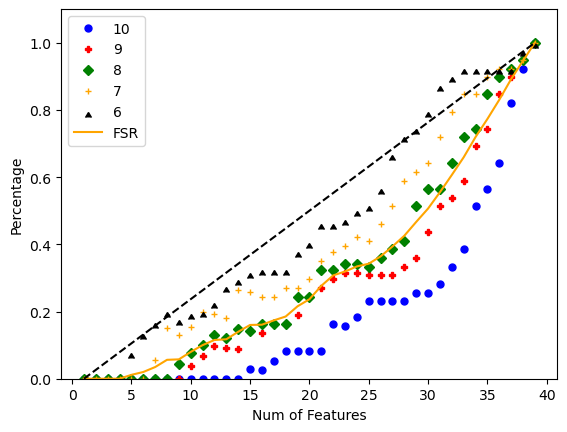

<Figure size 640x480 with 0 Axes>

In [6]:

# Full comparison

import itertools


coincidences = []
for t in range(len(index_REC[0])):

    auxiliar = list(itertools.chain(*[index_RFE[0][t]] + [index_RFE[1][t]] + [index_RFE[2][t]] +[index_RFE[3][t]] + [index_RFE[4][t]] + [index_REC[0][t]] + [index_REC[1][t]] + [index_REC[2][t]] + [index_REC[3][t]] + [index_REC[4][t]] ))
    
    auxiliar = list(set(auxiliar))
     
    ele_repeated_in = {}
    for ele in auxiliar:

        #Seeds = []
        Seeds_RFE = []
        Seeds_REC = []
        for seed in range(0,len(index_REC)):

            if ele in index_RFE[seed][t]:  
                Seeds_RFE.append(seed)

            if ele in index_REC[seed][t]:  
                Seeds_REC.append(seed + 5)

        ele_repeated_in[ele] = Seeds_RFE + Seeds_REC  # Diccionario con las veces que se repite cada elemento (keys) 
    
    coincidences.append(ele_repeated_in)



def Partial_coincidence(coincidences, num_of_coinc):

    percentage_of_repetaed_list = []
    Keys_list = []            #keys
    Seeds_list = []           #seeds ehre the key is repeated
    for t in range(len(coincidences)):

        list_of_keys = list(coincidences[t].keys())
        #list_of_values = list(coincidences[t].values())

        keys_list = []  #keys
        seeds_list = [] #seeds ehre the key is repeated
        count = 0
        for key in list_of_keys:

            if len(coincidences[t][key]) >= num_of_coinc:

                count += 1
                seeds_list.append(coincidences[t][key])
                keys_list.append(list_of_keys)
        
        Seeds_list.append(seeds_list)
        Keys_list.append(keys_list)
        percentage_of_repetaed_list.append(count/len(list_of_keys))

    #print(Seeds_list , Keys_list)
    return [percentage_of_repetaed_list, Seeds_list , Keys_list]


    
list_10 = Partial_coincidence(coincidences, 10)[0]
list_9 = Partial_coincidence(coincidences, 9)[0]
list_8 = Partial_coincidence(coincidences, 8)[0]
list_7 = Partial_coincidence(coincidences, 7)[0]
list_6 = Partial_coincidence(coincidences, 6)[0]


list_10.reverse()
list_9.reverse()
list_8.reverse()
list_7.reverse()
list_6.reverse()
#print(coincidences)


def FSR(list_5, list_4, list_3, list_2, list_1 ):

    out = []
    for i in range(len(list_5)):

        suma = 10 * list_5[i] + 9*list_4[i] + 8*list_3[i] + 7*list_2[i] + 6*list_1[i]
        out.append(suma/40)

    return out

fsr = FSR(list_10, list_9, list_8, list_7, list_6 )
#print(fsr)

y = [*range(1 , len(index_REC[0]) + 1)]
x = np.linspace(0,  1 , num=len(index_REC[0]) )


plt.plot(y, list_10, label = "10", marker='o', color =  "blue", markersize=5, linestyle= "None")
plt.plot(y, list_9, label = "9", marker='P', color = "red", markersize=5, linestyle= "None")
plt.plot(y, list_8, label = "8", marker='D', color = "green", markersize=5, linestyle= "None")
plt.plot(y, list_7, label = "7", marker="+" , color = "orange", markersize=5, linestyle= "None")
plt.plot(y, list_6, label = "6", marker=6 , color = "black", markersize=5, linestyle= "None")
plt.plot(y, fsr, label = "FSR",  color = "orange" )
plt.plot(y, x, color =  "black", markersize=5, linestyle= "--")


plt.legend(loc='upper left')
plt.xlabel("Num of Features")
plt.ylabel("Percentage")
plt.savefig(r'DATASETS/heart_disease/Pictures/Percentage.png', dpi = 300 )
#plt.yscale('log')
plt.ylim([0.0, 1.1])
#plt.title("Recall per class")
plt.show()
plt.clf()

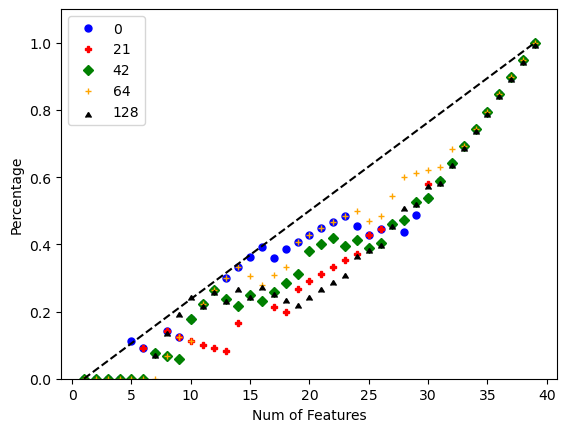

<Figure size 640x480 with 0 Axes>

In [8]:

# supplementary comparison

import itertools

def per_seed_comp(index_REC, index_RFE, semilla ):

    coincidences = []
    for t in range(len(index_REC[0])):

        auxiliar = list(itertools.chain(*[index_RFE[semilla][t]] + [index_REC[semilla][t]] ))
    
        auxiliar = list(set(auxiliar))
     
        ele_repeated_in = []
        for ele in auxiliar:
            
            if ele in index_RFE[semilla][t]:  
                if ele in index_REC[semilla][t]:  

                    ele_repeated_in.append(ele)  # Diccionario con las veces que se repite cada elemento (keys) 
    
        coincidences.append(len(ele_repeated_in)/len(auxiliar))


    return coincidences



    
list_0 = per_seed_comp(index_REC, index_RFE, 0)
list_21 = per_seed_comp(index_REC, index_RFE, 1 )
list_42 = per_seed_comp(index_REC, index_RFE, 2 )
list_64 = per_seed_comp(index_REC, index_RFE, 3 )
list_128 = per_seed_comp(index_REC, index_RFE, 4 )


list_0.reverse()
list_21.reverse()
list_42.reverse()
list_64.reverse()
list_128.reverse()
#print(coincidences)


y = [*range(1 , len(index_REC[0]) + 1)]
x = np.linspace(0,  1 , num=len(index_REC[0]) )


plt.plot(y, list_0, label = "0", marker='o', color =  "blue", markersize=5, linestyle= "None")
plt.plot(y, list_21, label = "21", marker='P', color = "red", markersize=5, linestyle= "None")
plt.plot(y, list_42, label = "42", marker='D', color = "green", markersize=5, linestyle= "None")
plt.plot(y, list_64, label = "64", marker="+" , color = "orange", markersize=5, linestyle= "None")
plt.plot(y, list_128, label = "128", marker=6 , color = "black", markersize=5, linestyle= "None")
plt.plot(y, x, color =  "black", markersize=5, linestyle= "--")


plt.legend(loc='upper left')
plt.xlabel("Num of Features")
plt.ylabel("Percentage")
plt.savefig(r'DATASETS/heart_disease/Pictures/Per_seed.png', dpi = 300 )
#plt.yscale('log')
plt.ylim([0.0, 1.1])
#plt.title("Recall per class")
plt.show()
plt.clf()